In [2]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import image

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import mean_absolute_error

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from tensorflow.keras import layers, models

import h5py
import numpy as np
import tensorflow as tf

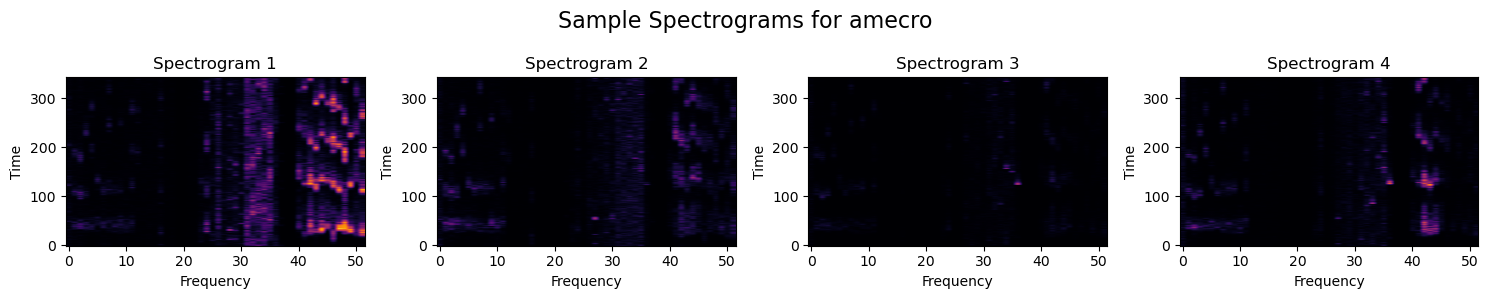

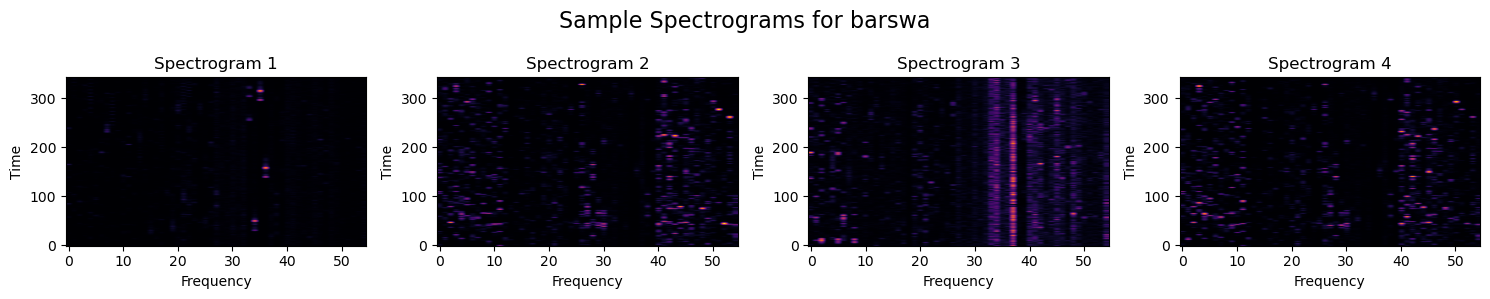

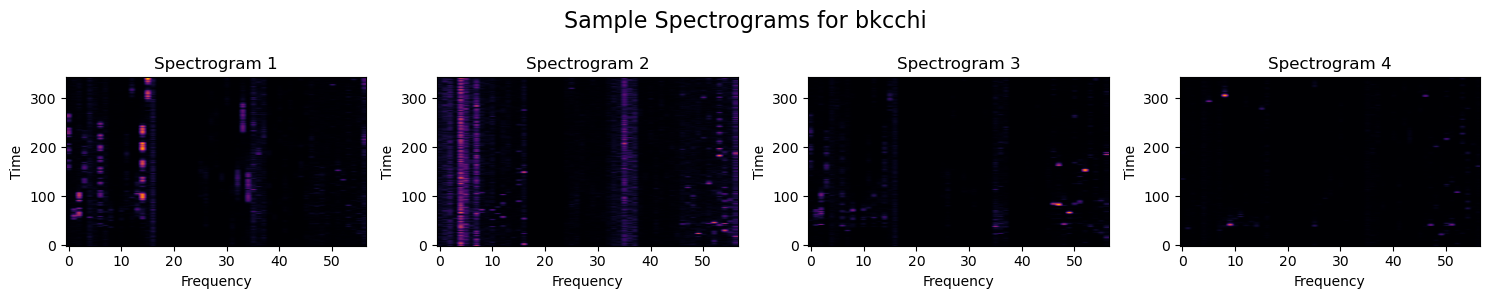

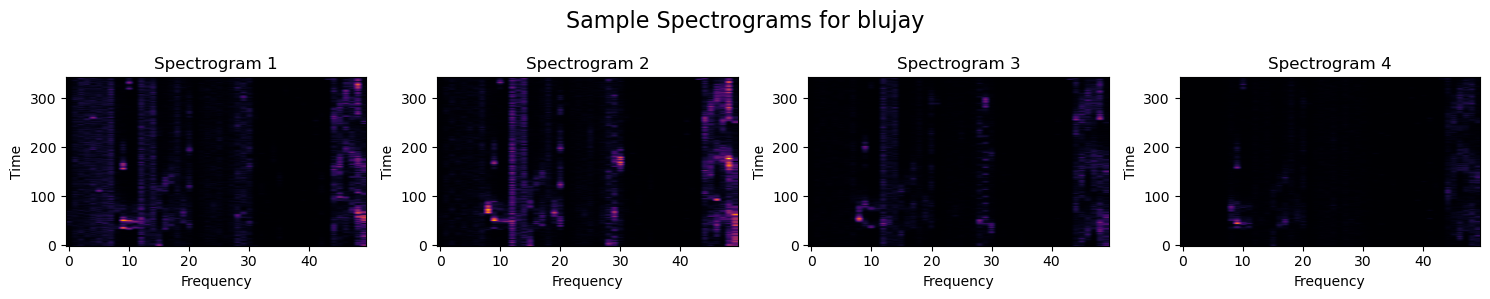

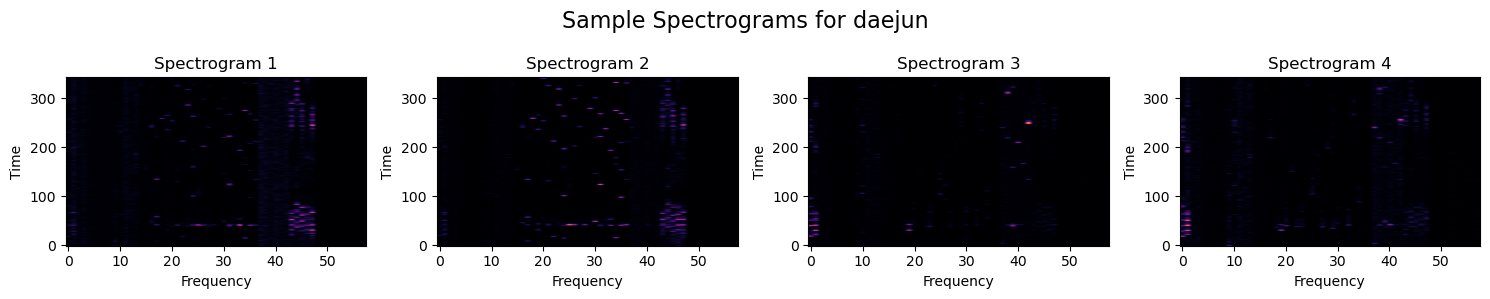

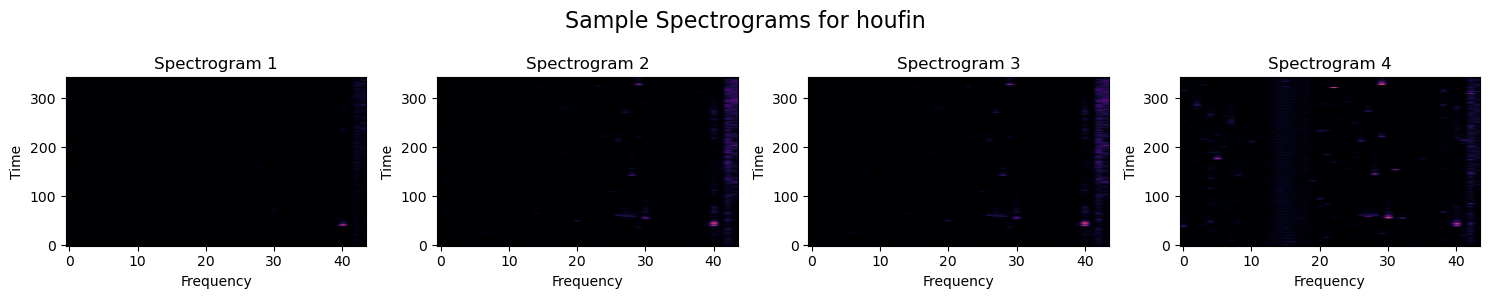

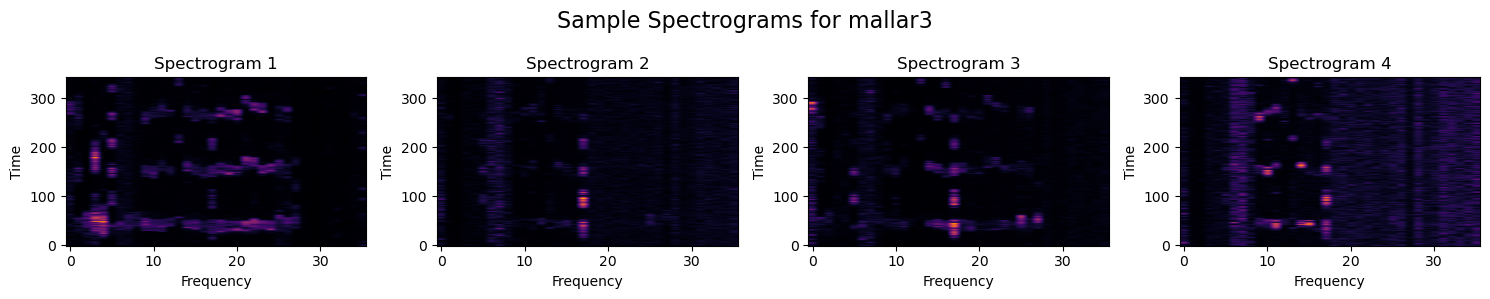

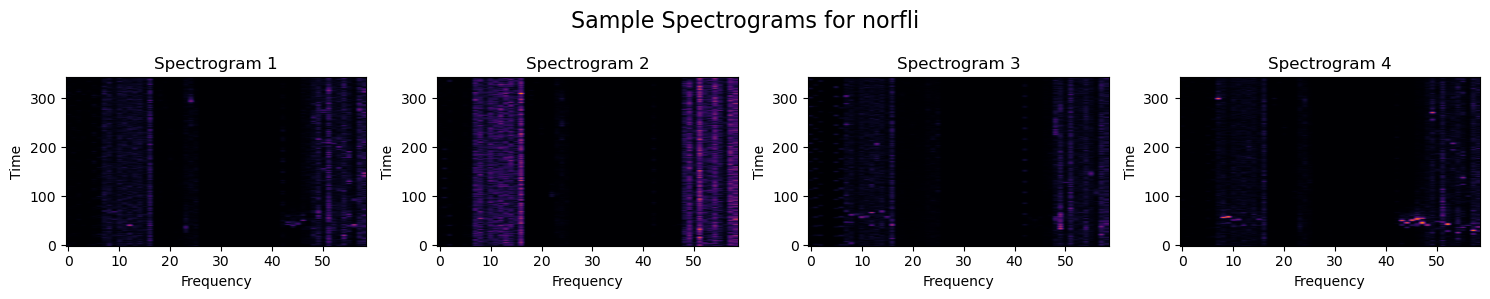

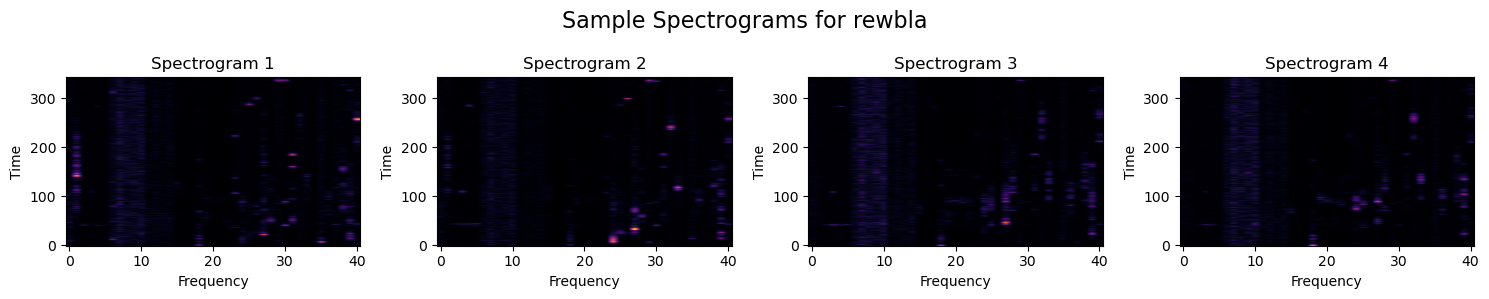

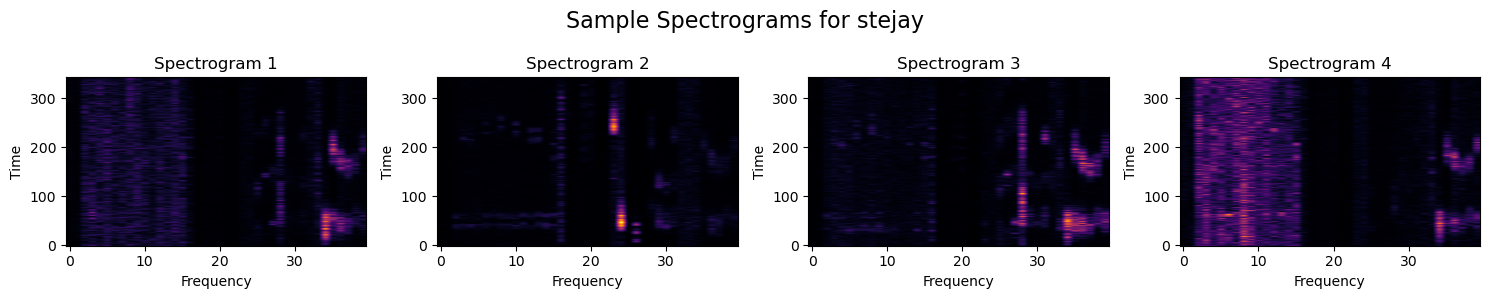

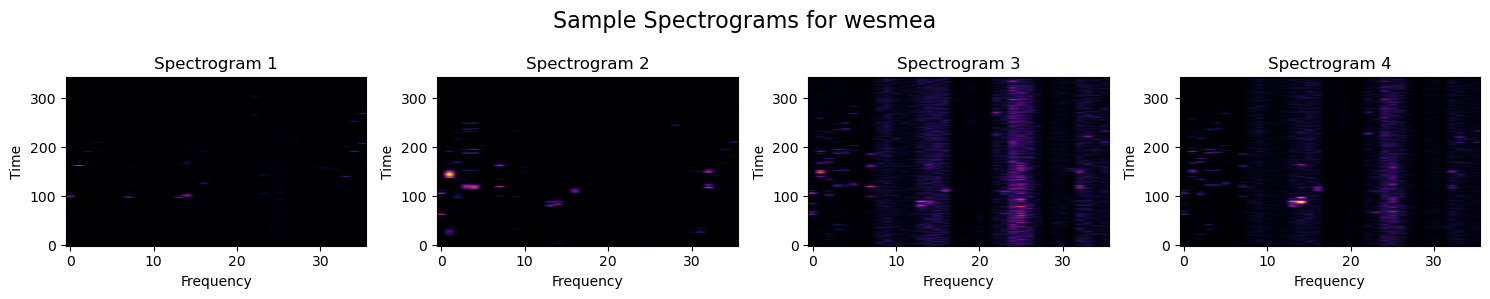

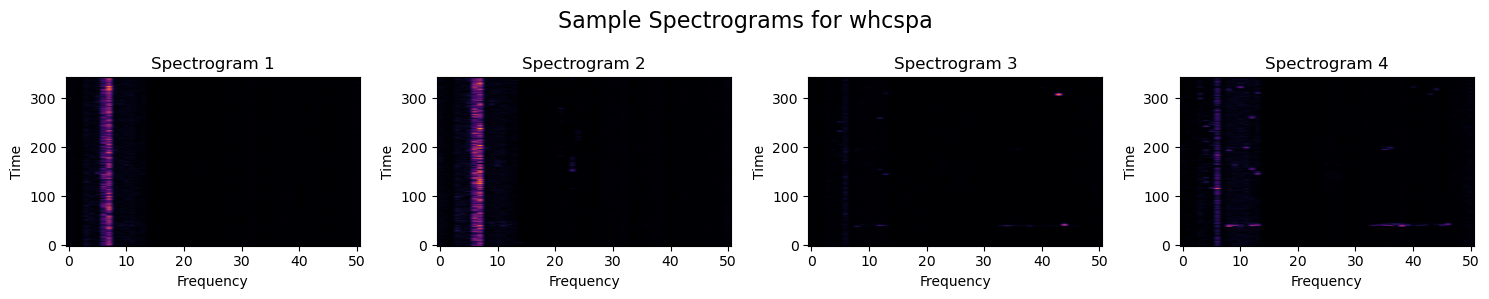

In [255]:
def visualize_data():
    with h5py.File(file_path, 'r') as f:
        species_keys = list(f.keys())
        num_spectrograms_to_visualize = 4
        for species in species_keys:
            spectrograms = f[species][:]
            fig, axes = plt.subplots(1, num_spectrograms_to_visualize, figsize=(15, 3))
            fig.suptitle(f"Sample Spectrograms for {species}", fontsize=16)
            for i in range(num_spectrograms_to_visualize):
                random_index = np.random.randint(0, len(spectrograms))
                axes[i].imshow(spectrograms[random_index], cmap='inferno', origin='lower')
                axes[i].set_title(f"Spectrogram {i+1}")
                axes[i].set_xlabel('Frequency')
                axes[i].set_ylabel('Time')
                axes[i].set_aspect('auto')
            plt.tight_layout()
            plt.show()
 

file_path = r"C:\Users\janan\Downloads\spectrograms.h5"
visualize_data()

Binary Model Amecro and BlueJay

In [6]:
f = h5py.File('spectrograms.h5', 'r')
list(f.keys())


['amecro',
 'barswa',
 'bkcchi',
 'blujay',
 'daejun',
 'houfin',
 'mallar3',
 'norfli',
 'rewbla',
 'stejay',
 'wesmea',
 'whcspa']

In [4]:
dset_amecro = f['amecro']
dset_amecro.shape

(256, 343, 52)

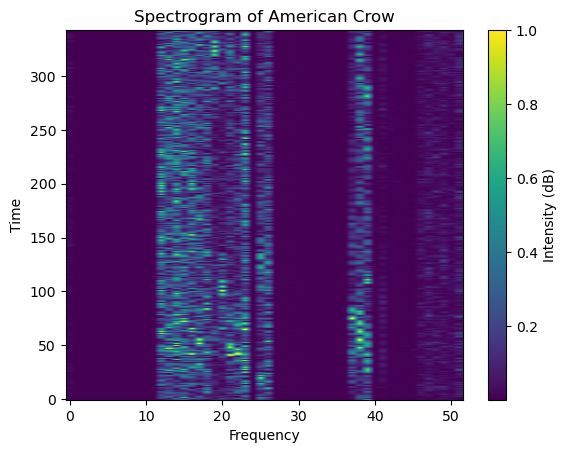

In [5]:
sample_spectrogram = dset_amecro[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of American Crow')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

In [5]:
dset_blujay = f['blujay']
dset_blujay.shape

(256, 343, 50)

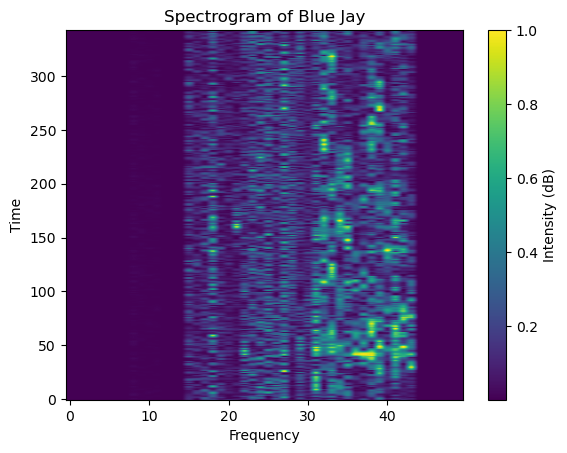

In [7]:
sample_spectrogram = dset_blujay[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of Blue Jay')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

In [6]:
dset_amecro_50 = dset_amecro[..., :50]
dset_amecro_50.shape

(256, 343, 50)

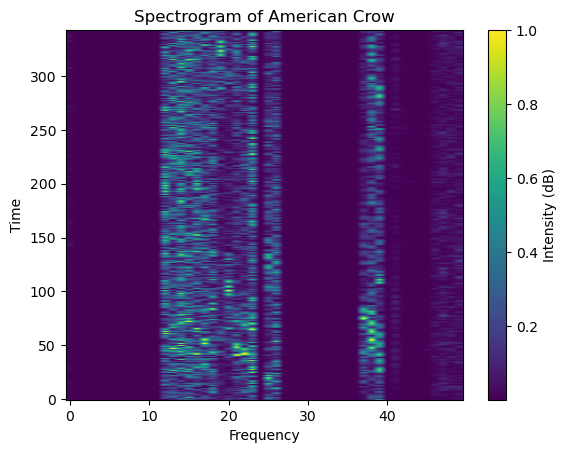

In [9]:
sample_spectrogram = dset_amecro_50[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of American Crow')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

In [8]:
# Combining Spectrams
X_amecro = np.transpose(dset_amecro_50, (2, 1, 0))  
X_blujay = np.transpose(dset_blujay, (2, 1, 0))
X = np.concatenate((X_amecro, X_blujay), axis=0)

NameError: name 'dset_amecro_50' is not defined

In [8]:
# Generate labels 0 for Amercro and 1 for Blujay
y_amecro = np.zeros(X_amecro.shape[0]) 
y_blujay = np.ones(X_blujay.shape[0])  
y = np.concatenate((y_amecro, y_blujay), axis=0)

In [7]:
# Perform train-test split - Testing 25% and Training 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)


NameError: name 'X' is not defined

In [10]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (75, 343, 256)
y_train.shape: (75,)
X_test.shape: (25, 343, 256)
y_test.shape: (25,)


In [11]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(343, 256, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\janan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.6104 - loss: 0.6636 - val_accuracy: 0.6667 - val_loss: 0.4560
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.8799 - loss: 0.3263 - val_accuracy: 0.9333 - val_loss: 0.4270
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.9347 - loss: 0.2323 - val_accuracy: 0.7333 - val_loss: 0.4588
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.8910 - loss: 0.2151 - val_accuracy: 0.7333 - val_loss: 0.4795
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.9014 - loss: 0.1665 - val_accuracy: 0.7333 - val_loss: 0.3727
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.8917 - loss: 0.1708 - val_accuracy: 0.7333 - val_loss: 0.2723
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.8917 - loss: 0.1604 - val_accuracy: 0.7333 - val_loss: 0.2377
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.9458 - loss: 0.1485 - val_accuracy: 0.7333 - val_loss: 0.2755
Epoch 9/

In [15]:
history.history.keys() # to see available metrics

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

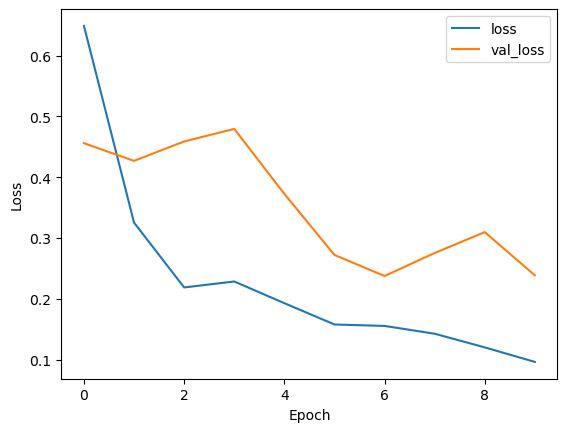

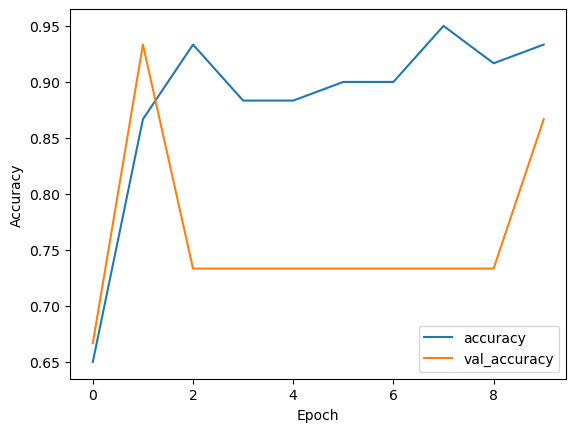

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 96.00%


In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9600 - loss: 0.0951
Test Loss: 0.09511382132768631, Test Accuracy: 0.9599999785423279


In [19]:
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(343, 256, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [22]:
history = model_1.fit(X_train, y_train, epochs=20, batch_size=75, validation_split=0.2)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.4500 - loss: 0.6938 - val_accuracy: 0.6667 - val_loss: 0.5913
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8333 - loss: 0.5880 - val_accuracy: 0.7333 - val_loss: 0.4835
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8833 - loss: 0.2916 - val_accuracy: 0.8000 - val_loss: 1.2541
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 1.4493 - val_accuracy: 0.2667 - val_loss: 1.3830
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5500 - loss: 0.8210 - val_accuracy: 0.7333 - val_loss: 0.5687
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8833 - loss: 0.5207 - val_accuracy: 0.7333 - val_loss: 0.4777
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8833 - loss: 0.3907 - val_accuracy: 0.7333 - val_loss: 0.3897
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8833 - loss: 0.2916 - val_accuracy: 0.7333 - val_loss: 0.3547


In [23]:
history.history.keys() # to see available metrics

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 92.00%


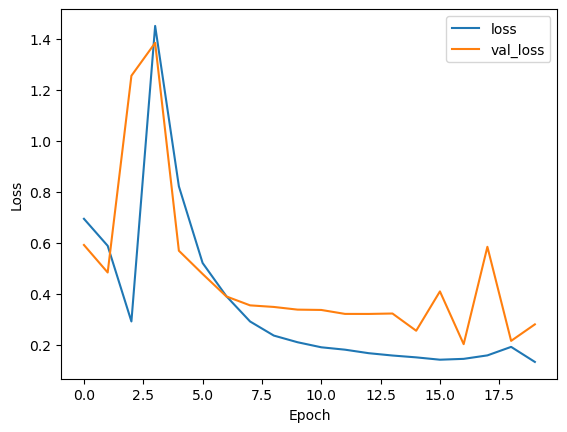

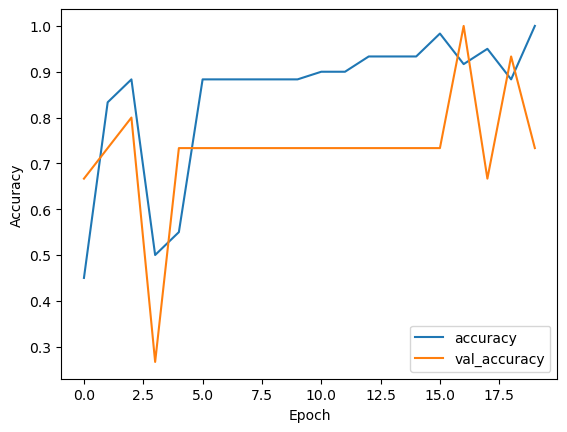

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [11]:
model_2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(343, 256, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(rate=0.3),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(rate=0.4),
    #Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    #MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\janan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model_2.fit(X_train, y_train, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4729 - loss: 0.7910 - val_accuracy: 0.2667 - val_loss: 0.6561
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6438 - loss: 0.5361 - val_accuracy: 0.7333 - val_loss: 0.4635
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9104 - loss: 0.3139 - val_accuracy: 0.7333 - val_loss: 0.3433
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.9104 - loss: 0.2251 - val_accuracy: 0.7333 - val_loss: 0.2943
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8958 - loss: 0.2130 - val_accuracy: 0.7333 - val_loss: 0.2989
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9250 - loss: 0.1606 - val_accuracy: 0.9333 - val_loss: 0.2293
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.9771 - loss: 0.1234 - val_accuracy: 0.7333 - val_loss: 0.2617
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9646 - loss: 0.1297 - val_accuracy: 0.9333 - val_loss: 0.2262
Epoch 9/10
3/

In [30]:
history.history.keys() # to see available metrics

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [14]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 96.00%


Multi

In [5]:
dset_blujay_35.shape

(256, 343, 35)

In [9]:
dset_amecro_35 = f['amecro'][..., :35]
dset_barswa_35 = f['barswa'][..., :35]
dset_bkcchi_35 = f['bkcchi'][..., :35]
dset_blujay_35 = f['blujay'][..., :35]
dset_daejun_35 = f['daejun'][..., :35]
dset_houfin_35 = f['houfin'][..., :35]
dset_mallar3_35= f['mallar3'][..., :35]
dset_norfli_35 = f['norfli'][..., :35]
dset_rewbla_35 = f['rewbla'][..., :35]
dset_stejay_35 = f['stejay'][..., :35]
dset_wesmea_35 = f['wesmea'][..., :35]
dset_whcspa_35 = f['whcspa'][..., :35]


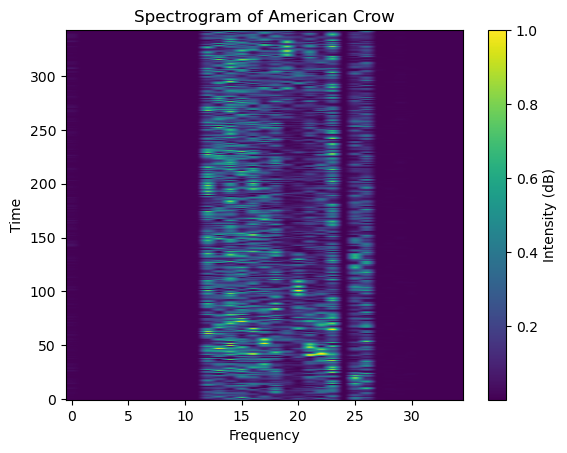

In [129]:
sample_spectrogram = dset_amecro_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of American Crow')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

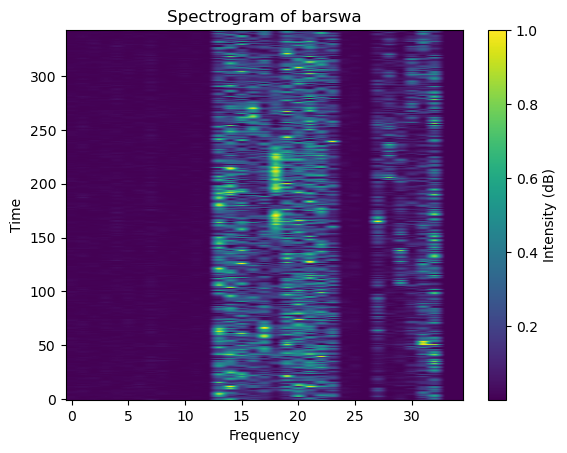

In [130]:
sample_spectrogram = dset_barswa_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of barswa')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

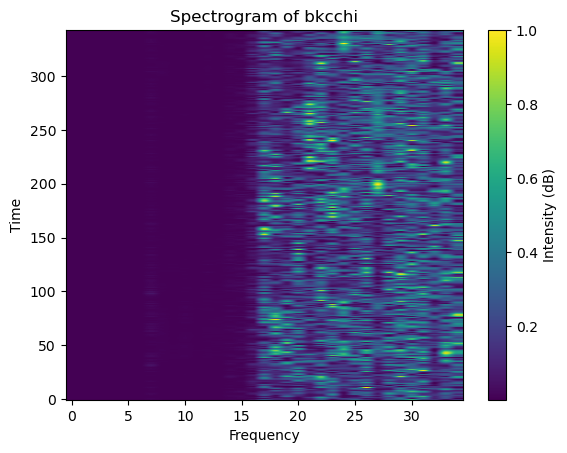

In [131]:
sample_spectrogram = dset_bkcchi_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of bkcchi')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

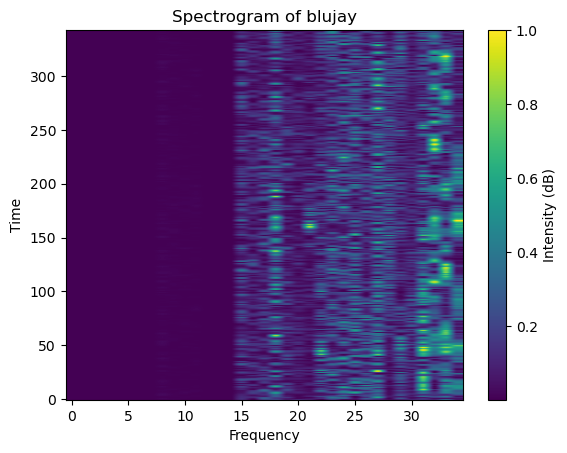

In [132]:
sample_spectrogram = dset_blujay_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of blujay')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

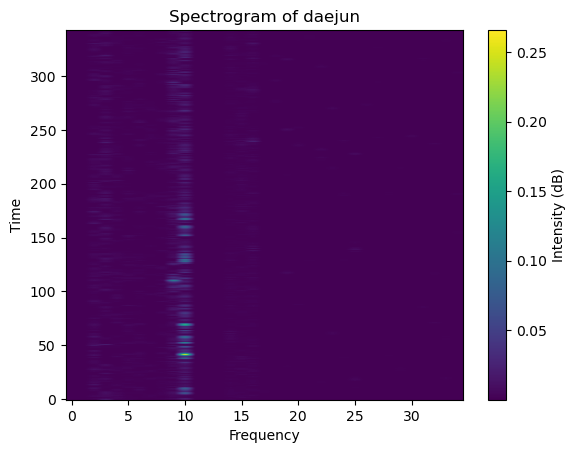

In [133]:
sample_spectrogram = dset_daejun_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of daejun')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

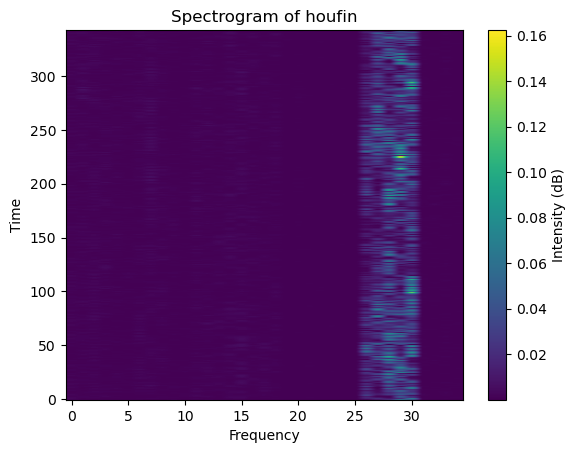

In [134]:
sample_spectrogram = dset_houfin_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of houfin')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

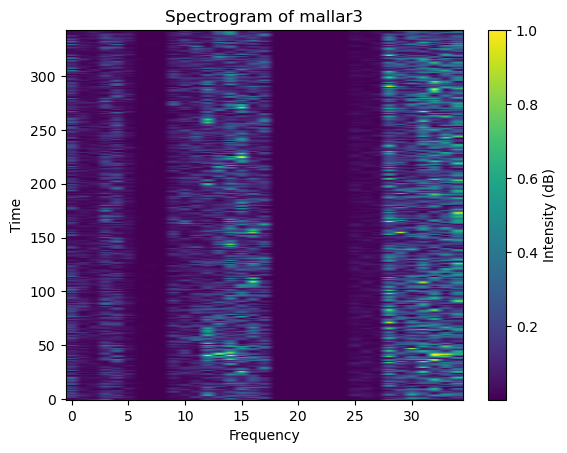

In [135]:
sample_spectrogram = dset_mallar3_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of mallar3')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

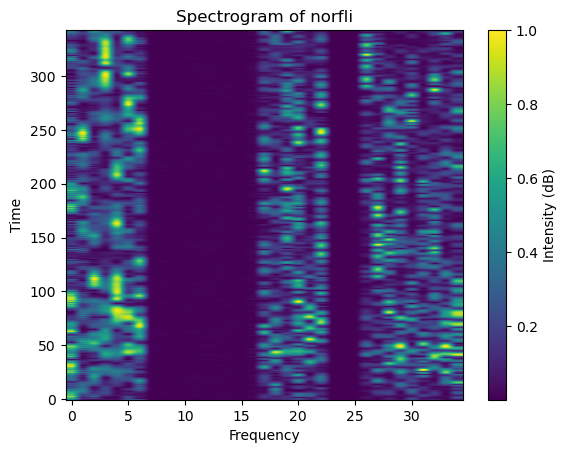

In [136]:
sample_spectrogram = dset_norfli_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of norfli')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

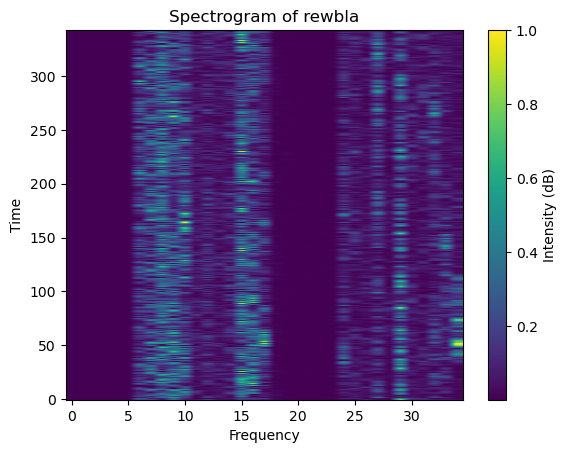

In [137]:
sample_spectrogram = dset_rewbla_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of rewbla')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

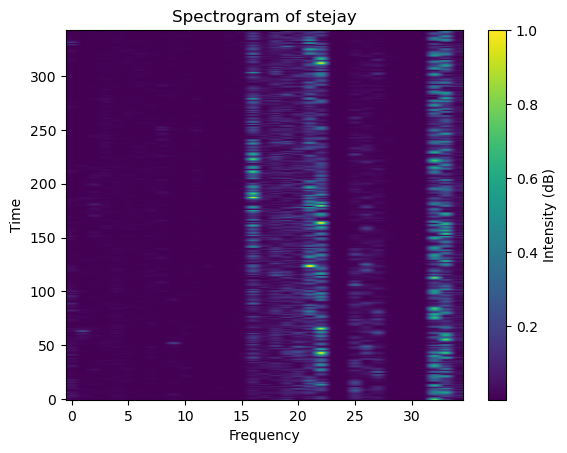

In [138]:
sample_spectrogram = dset_stejay_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of stejay')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

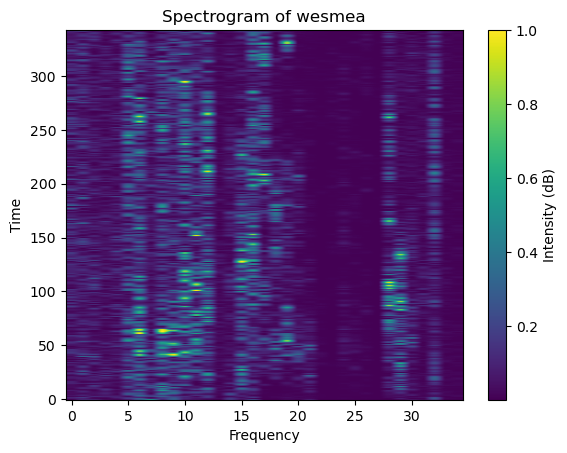

In [139]:
sample_spectrogram = dset_wesmea_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of wesmea')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

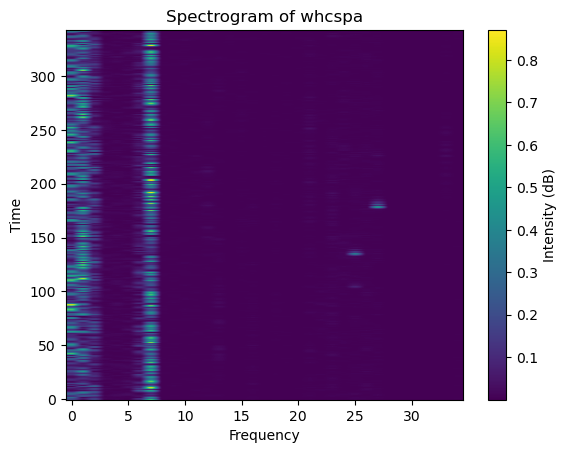

In [140]:
sample_spectrogram = dset_whcspa_35[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of whcspa')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

In [10]:
X_amecro = np.transpose(dset_amecro_35, (2, 1, 0))  
X_barswa = np.transpose(dset_barswa_35, (2, 1, 0))
X_bkcchi = np.transpose(dset_bkcchi_35, (2, 1, 0))
X_blujay = np.transpose(dset_blujay_35, (2, 1, 0))
X_daejun = np.transpose(dset_daejun_35, (2, 1, 0))
X_houfin = np.transpose(dset_houfin_35, (2, 1, 0))
X_mallar3 = np.transpose(dset_mallar3_35, (2, 1, 0))
X_norfli = np.transpose(dset_norfli_35, (2, 1, 0))
X_rewbla = np.transpose(dset_rewbla_35, (2, 1, 0))
X_stejay = np.transpose(dset_stejay_35, (2, 1, 0))
X_wesmea = np.transpose(dset_wesmea_35, (2, 1, 0))
X_whcspa = np.transpose(dset_whcspa_35, (2, 1, 0))
X = np.concatenate((X_amecro, X_barswa,X_bkcchi,X_blujay,X_daejun,X_houfin,X_mallar3,X_norfli,X_rewbla,X_stejay,X_wesmea,X_whcspa), axis=0)

In [11]:
X.shape

(420, 343, 256)

In [12]:
labels = ['amecro', 'barswa', 'bkcchi', 'blujay', 'daejun', 'houfin', 'mallar3', 'norfli', 'rewbla', 'stejay', 'wesmea', 'whcspa']
y = np.repeat(np.arange(len(labels)), 35)



In [56]:
print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9

In [103]:
print(len(y))

420


In [9]:
len(labels)

12

In [13]:
# train-test split - Training 75% Testing 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [14]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (315, 343, 256)
y_train.shape: (315,)
X_test.shape: (105, 343, 256)
y_test.shape: (105,)


In [15]:
X_train = np.expand_dims(X_train, axis=-1)  
X_test = np.expand_dims(X_test, axis=-1)

#X_train = X_train.transpose(0, 2, 3, 1) 
#X_test = X_test.transpose(0, 2, 3, 1)


In [16]:
y_train = to_categorical(y_train, num_classes=len(labels))
y_test = to_categorical(y_test, num_classes=len(labels))

In [58]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(343,256,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels), activation='softmax')  
])

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [60]:
model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2034 - loss: 2.4127 - val_accuracy: 0.5397 - val_loss: 1.5882
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6707 - loss: 1.1122 - val_accuracy: 0.5397 - val_loss: 1.2213
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8876 - loss: 0.4601 - val_accuracy: 0.6825 - val_loss: 1.4275
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9448 - loss: 0.1980 - val_accuracy: 0.7460 - val_loss: 1.4890
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9555 - loss: 0.1130 - val_accuracy: 0.7302 - val_loss: 1.7292
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9981 - loss: 0.0262 - val_accuracy: 0.7460 - val_loss: 2.1763
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 502s 20s/step - accuracy: 0.9992 - loss: 0.0224 - val_accuracy: 0.7143 - val_loss: 2.3639
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9858 - loss: 0.0537 - val_accuracy: 0.7302 - val_los

In [61]:
history.history.keys() # to see available metrics

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [62]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 69.52%


In [35]:
model_multi_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(343,256,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')  
])

C:\Users\janan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model_multi_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
model_multi_1.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2424 - loss: 2.3315 - val_accuracy: 0.5556 - val_loss: 1.3442
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7473 - loss: 0.9207 - val_accuracy: 0.6032 - val_loss: 1.4791
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8456 - loss: 0.4084 - val_accuracy: 0.6190 - val_loss: 1.5086
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9534 - loss: 0.2279 - val_accuracy: 0.6349 - val_loss: 1.6374
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9697 - loss: 0.0990 - val_accuracy: 0.6825 - val_loss: 2.0766
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9703 - loss: 0.0749 - val_accuracy: 0.6508 - val_loss: 2.5640
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 793ms/step - accuracy: 0.9616 - loss: 0.4682 - val_accuracy: 0.5079 - val_loss: 1.5994
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9363 - loss: 0.2767 - val_accuracy: 0.6508 - val_lo

In [68]:
score = model_multi_1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 63.81%


In [21]:
model_multi_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(343,256,1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')  
])

In [22]:
model_multi_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
model_multi_2.fit(X_train, y_train, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 444ms/step - accuracy: 0.2289 - loss: 2.3972 - val_accuracy: 0.5079 - val_loss: 1.6247
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 876ms/step - accuracy: 0.7019 - loss: 1.2192 - val_accuracy: 0.6190 - val_loss: 1.2169
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 744ms/step - accuracy: 0.8915 - loss: 0.4577 - val_accuracy: 0.6190 - val_loss: 1.1982
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 798ms/step - accuracy: 0.9221 - loss: 0.2587 - val_accuracy: 0.6032 - val_loss: 1.6146
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 726ms/step - accuracy: 0.9593 - loss: 0.2847 - val_accuracy: 0.7302 - val_loss: 1.3009
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 740ms/step - accuracy: 0.9510 - loss: 0.1520 - val_accuracy: 0.6825 - val_loss: 1.3366
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 742ms/step - accuracy: 0.9912 - loss: 0.0488 - val_accuracy: 0.6349 - val_loss: 1.5008
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 733ms/step - accuracy: 0.9985 - loss: 0.0229 - val_accur

In [24]:
score = model_multi_2.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 72.38%


In [17]:
model_multi_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(343, 256, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'), 
    Dropout(0.5),  
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')  
])

C:\Users\janan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model_multi_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model_multi_3.fit(X_train, y_train, epochs=10, batch_size=15, validation_split=0.2)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.1603 - loss: 2.4518 - val_accuracy: 0.3968 - val_loss: 1.9097
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.4732 - loss: 1.7012 - val_accuracy: 0.4444 - val_loss: 1.6607
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.6025 - loss: 1.3224 - val_accuracy: 0.6190 - val_loss: 1.3212
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.7802 - loss: 0.7261 - val_accuracy: 0.6190 - val_loss: 1.2848
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 130s 8s/step - accuracy: 0.8136 - loss: 0.5692 - val_accuracy: 0.6984 - val_loss: 1.5530
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8152 - loss: 0.4795 - val_accuracy: 0.6825 - val_loss: 1.1834
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8807 - loss: 0.3745 - val_accuracy: 0.7302 - val_loss: 1.6191
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8989 - loss: 0.2633 - val_accuracy: 0.7143 - val_loss

In [20]:
score = model_multi_3.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 71.43%


In [19]:
y_pred_probs = model_multi_3.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 813ms/step


In [20]:
class_labels = np.unique(y_test)

In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

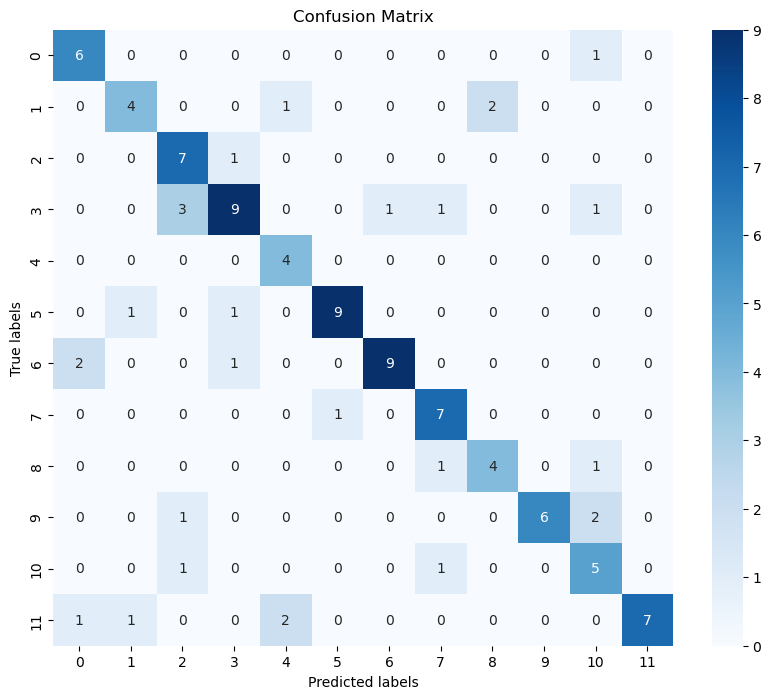

In [259]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [25]:
import librosa
import numpy as np
from skimage.transform import resize
 
def load_and_convert_mp3(file_paths):
    spectrograms = []
    for file_path in file_paths:
        audio_data, sr = librosa.load(file_path, sr=None)
        spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=2048, hop_length=512)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        resized_spectrogram = resize(spectrogram, (343, 256), anti_aliasing=True)
        spectrograms.append(resized_spectrogram)
    return np.array(spectrograms)
 
test_file_paths = [
    r"C:\Users\janan\Downloads\test_birds\test_birds\test1.mp3",
    r"C:\Users\janan\Downloads\test_birds\test_birds\test2.mp3",
    r"C:\Users\janan\Downloads\test_birds\test_birds\test3.mp3"
]
 
test_spectrograms = load_and_convert_mp3(test_file_paths)
 


C:\Users\janan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [26]:
import librosa
import numpy as np
from skimage.transform import resize

def load_and_convert_mp3(file_paths):
    spectrograms = []
    for file_path in file_paths:
        audio_data, sr = librosa.load(file_path, sr=None)
        
        # Trim silent parts from the audio
        trimmed_audio, _ = librosa.effects.trim(audio_data)
        
        # Compute the spectrogram for the entire trimmed audio
        spectrogram = librosa.feature.melspectrogram(y=trimmed_audio, sr=sr, n_fft=2048, hop_length=512)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        
        # Resize the spectrogram to the desired shape
        resized_spectrogram = resize(spectrogram, (343, 256), anti_aliasing=True)
        
        # Append the spectrogram to the list
        spectrograms.append(resized_spectrogram)
    return np.array(spectrograms)

test_file_paths = [
    r"C:\Users\janan\Downloads\test_birds\test_birds\test1.mp3",
    r"C:\Users\janan\Downloads\test_birds\test_birds\test2.mp3",
    r"C:\Users\janan\Downloads\test_birds\test_birds\test3.mp3"
]

test_spectrograms = load_and_convert_mp3(test_file_paths)


In [27]:
from scipy.signal import resample

def load_and_convert_mp3(file_paths):
    spectrograms = []
    for file_path in file_paths:
        audio_data, sr = librosa.load(file_path, sr=None)
        
        # Trim silent parts from the audio
        trimmed_audio, _ = librosa.effects.trim(audio_data)
        
        # Resample the audio to half its original sample rate
        target_sr = sr // 2  # Target sample rate (half of original) as did in training data
        resampled_audio = resample(trimmed_audio, len(trimmed_audio) // 2)
        
        # Compute the spectrogram for the resampled audio
        spectrogram = librosa.feature.melspectrogram(y=resampled_audio, sr=target_sr, n_fft=2048, hop_length=512)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        
        # Resize the spectrogram to the desired shape
        resized_spectrogram = resize(spectrogram, (343, 256), anti_aliasing=True)
        
        # Append the spectrogram to the list
        spectrograms.append(resized_spectrogram)
    return np.array(spectrograms)

test_file_paths = [
    r"C:\Users\janan\Downloads\test_birds\test_birds\test1.mp3",
    r"C:\Users\janan\Downloads\test_birds\test_birds\test2.mp3",
    r"C:\Users\janan\Downloads\test_birds\test_birds\test3.mp3"
]

test_spectrograms = load_and_convert_mp3(test_file_paths)


In [28]:
len(test_spectrograms)

3

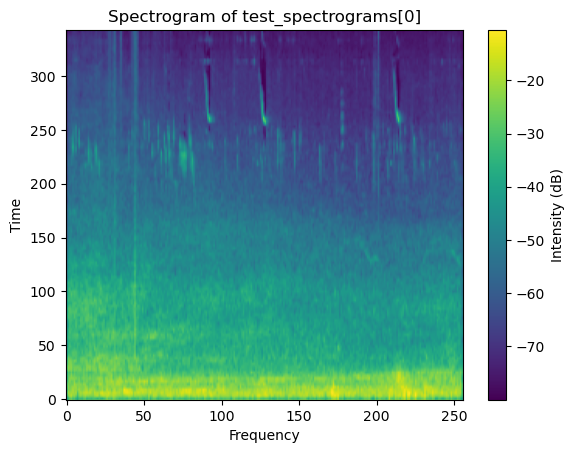

In [236]:
sample_spectrogram = test_spectrograms[0] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of test_spectrograms[0]')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

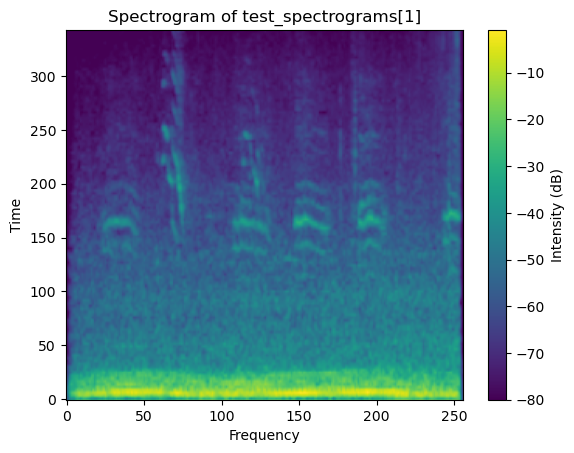

In [237]:
sample_spectrogram = test_spectrograms[1] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of test_spectrograms[1]')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

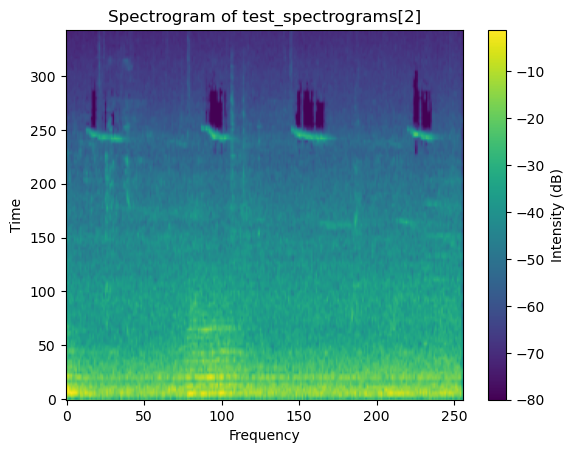

In [238]:
sample_spectrogram = test_spectrograms[2] 
plt.imshow(sample_spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram of test_spectrograms[2]')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.colorbar(label='Intensity (dB)')
plt.show()

In [29]:
test_spectrograms.shape

(3, 343, 256)

In [30]:
test_spectrograms = np.expand_dims(test_spectrograms, axis=-1)

In [31]:
test_spectrograms.shape

(3, 343, 256, 1)

In [32]:
predictions = model_multi_3.predict(test_spectrograms)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


In [33]:
top5_predictions = np.argsort(predictions, axis=1)[:, -5:][:, ::-1]

In [34]:
labels = ['amecro', 'barswa', 'bkcchi', 'blujay', 'daejun', 'houfin', 'mallar3', 'norfli', 'rewbla', 'stejay', 'wesmea', 'whcspa']

In [35]:
for i, top5_indices in enumerate(top5_predictions):
    print(f"Top 5 predictions for Spectrogram {i+1}:")
    for j, idx in enumerate(top5_indices):
        print(f"{j+1}. {labels[idx]}: {predictions[i][idx]}")
    print()

Top 5 predictions for Spectrogram 1:
1. daejun: 1.0
2. whcspa: 0.0
3. wesmea: 0.0
4. stejay: 0.0
5. rewbla: 0.0

Top 5 predictions for Spectrogram 2:
1. daejun: 1.0
2. whcspa: 0.0
3. wesmea: 0.0
4. stejay: 0.0
5. rewbla: 0.0

Top 5 predictions for Spectrogram 3:
1. daejun: 1.0
2. whcspa: 0.0
3. wesmea: 0.0
4. stejay: 0.0
5. rewbla: 0.0



In [37]:
predictions = model_multi_2.predict(test_spectrograms)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [38]:
top5_predictions = np.argsort(predictions, axis=1)[:, -5:][:, ::-1]
for i, top5_indices in enumerate(top5_predictions):
    print(f"Top 5 predictions for Spectrogram {i+1}:")
    for j, idx in enumerate(top5_indices):
        print(f"{j+1}. {labels[idx]}: {predictions[i][idx]}")
    print()

Top 5 predictions for Spectrogram 1:
1. norfli: 1.0
2. whcspa: 0.0
3. wesmea: 0.0
4. stejay: 0.0
5. rewbla: 0.0

Top 5 predictions for Spectrogram 2:
1. norfli: 1.0
2. whcspa: 0.0
3. wesmea: 0.0
4. stejay: 0.0
5. rewbla: 0.0

Top 5 predictions for Spectrogram 3:
1. norfli: 1.0
2. whcspa: 0.0
3. wesmea: 0.0
4. stejay: 0.0
5. rewbla: 0.0

